# Prediction Using Unsupervised ML 

## NAME : Riya Sara Mathew

### Data Science and Business Analytics Intern 
### GRIP - The Sparks Foundation

AIM : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

DATASET : "Iris Species"

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species (Iris Setosa , Iris Versicolour , Iris Virginica)

### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [4]:
iris=pd.read_csv('Iris.csv')

In [5]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
iris = iris.drop(['Id'], axis=1)

### Using K-means Clustering Algorithm

In [10]:
from sklearn.cluster import KMeans
wcss = []
X = iris.drop(['Species'], axis=1)
for i in range(1, 11):
    classifier = KMeans(n_clusters = i)
    classifier.fit(X)
    wcss.append(classifier.inertia_)
    

### Finding number of centroids using Elbow method

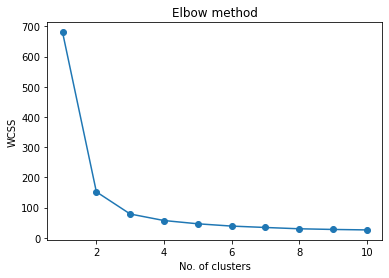

In [11]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Training the model

In [12]:
clf = KMeans(n_clusters = 3)
Y = clf.fit_predict(X)

### Visualization of the clusters

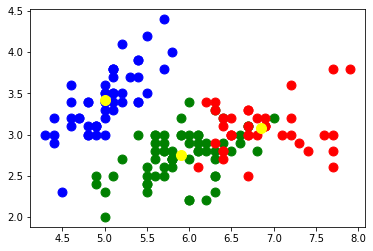

In [13]:
# Visualizing the clusters
X = np.array(X)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 80, c = 'b', label = 'Iris-setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 80, c = 'g', label = 'Iris-versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 80, c = 'r', label = 'Iris-virginica')

# Visualizing centroids of the clusters
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.show()

### THANK YOU!